# 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

Selecting previously unselected package fonts-nanum.
(Reading database ... 122664 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<Figure size 1500x1200 with 0 Axes>

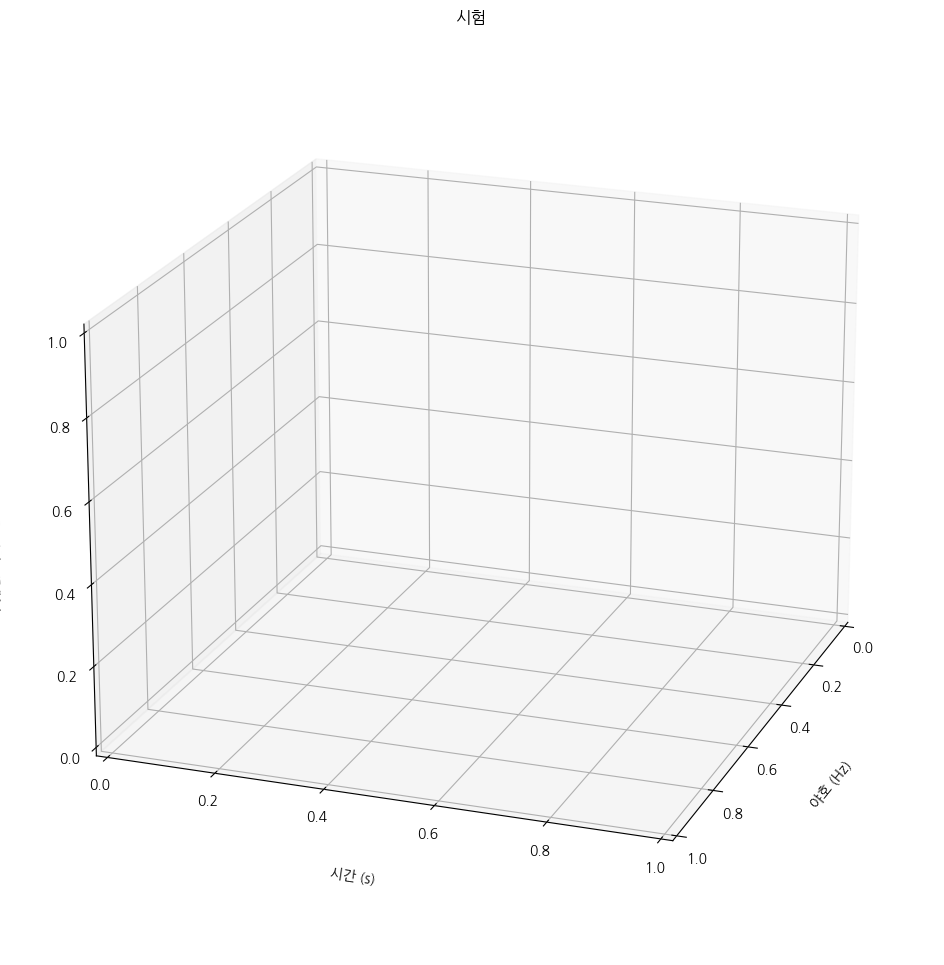

In [ ]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

fig = plt.figure(figsize=(15, 12))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(15, 12))

graph_title = '시험'
ax.set_title(f'{graph_title}')
ax.set_xlabel('야호 (Hz)', labelpad=20)
ax.set_ylabel('시간 (s)', labelpad=20)
ax.set_zlabel('이건 뭐지 (dB/Hz)', labelpad=20)

ax.view_init(20, 20)
plt.show()

In [ ]:
pip install ko-sentence-transformers

In [ ]:
#감성어 사전 dictionary 로 저장
#https://velog.io/@jochedda/NLP-%EB%84%A4%EC%9D%B4%EB%B2%84-%EC%87%BC%ED%95%91-%EB%A6%AC%EB%B7%B0-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D
import pandas as pd
#!git clone https://github.com/park1200656/KnuSentiLex.git
f = pd.read_csv('/content/KnuSentiLex/SentiWord_Dict.txt','\t', header=None, index_col=0).squeeze("columns")
dictionary = f.to_dict()
dictionary


In [ ]:
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')

#%config InlineBackend.figure_format = 'retina'

#!apt -qq -y install fonts-NanumBarunGothic

#import matplotlib.font_manager as fm
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#font = fm.FontProperties(fname=fontpath, size = 10)
#plt.rc('font', family='NanumBarunGothic')
#mpl.font_manager._rebuild()

In [ ]:
#!pip install PyKomoran
from PyKomoran import *
import re
komoran = Komoran(DEFAULT_MODEL['LIGHT'])
n_= []

for i in range(len(df)):
  nouns = komoran.get_morphes_by_tags(df.iloc[i]['Q41'], tag_list = ['NNP', 'NNG', 'VA'])
  n_.append(' '.join(nouns))

df['nouns'] = n_
df = df[df['nouns']!='']
df.head()



,Q41,nouns,words,dbscan,sent_score,tokens,specific_tokens
0,화이팅,화이팅,화이팅,-1,0.000000,[화이팅/NNG],[화이팅]
1,"건강검진을 조금더 확대해야 될것같다 젊은 나이에도 암발병률이 높아지고있고 20,3...",건강검진 확대 같 젊 나이 암 발병 식습관 음주 건강관리 필요,건강검진 확대 되다 같다 젊다 나이 암 발병 높아지다 식습관 음주 건강관리 필요,-1,0.076923,[건강검진/NNG 을/JKO 조금/MAG 더/MAG 확대/NNG 하/XSV 아야/E...,"[건강검진, 확대, 되, 같, 젊, 나이, 암, 발병, 높아지, 식습관, 음주, 건..."
2,건강보험에 만족하고 국가 대응에도 만족한다,건강 보험 만족 국가 대응 만족,건강 보험 만족 국가 대응 만족,-1,0.666667,[건강/NNG 보험/NNG 에/JKB 만족/NNG 하/XSV 고/EC 국가/NNG ...,"[건강, 보험, 만족, 국가, 대응, 만족]"
3,우리나라 기후변화나 통일문제에 대해서 많은 사람들이 경각심을 갖고 행동해야 한다고 ...,우리나라 기후 변화 통일 문제 많 사람 경각심 행동 생각,우리나라 기후 변화 통일 문제 대하다 많다 사람 경각심 가지다 행동 하다 생각,-1,0.153846,[우리나라/NNG 기후/NNG 변화/NNG 나/JC 통일/NNG 문제/NNG 에/J...,"[우리나라, 기후, 변화, 통일, 문제, 대하, 많, 사람, 경각심, 가지, 행동,..."
4,건강은 스스로 챙겨야하는(그만큼 주의해야한다고) 시민의식이 필요하다고 생각하고 병원...,건강 주의 시민 의식 필요 생각 병원 개선 점 작 개인 병원 병원 크 병원 암 같 ...,건강 챙기다 주의 시민 의식 필요 생각 병원 개선 점 대하다 작다 개인 병원 병원 ...,-1,0.075000,[건강/NNG 은/JX 스스로/MAG 챙기/VV 어야/EC 하/VX 는/ETM (/...,"[건강, 챙기, 주의, 시민, 의식, 필요, 생각, 병원, 개선, 점, 대하, 작,..."


In [ ]:
def lemmatize(sentence):
  morphtags = komoran.pos(sentence)
  words = []
  for m, t in enumerate(morphtags):
    k = t.get_pos()
    if k == 'NNP' or k == 'NNG':
      words.append(t.get_morph())
    elif k == 'VA' or k=='VV':
      words.append(t.get_morph()+ '다')
  return words

w_ = []
for i in range(len(df)):
  words = lemmatize(df.iloc[i]['Q41'])
  w_.append(' '.join(words))
df['words'] = w_
df = df[df['words']!='']
df.head()

#df['nounize tokens'] = df['Q41'].map(lambda s: lemmatize(s))
#df.head()


,Q41,nouns,words,dbscan,sent_score,tokens,specific_tokens,nounize tokens
0,화이팅,화이팅,화이팅,-1,0.000000,[화이팅/NNG],[화이팅],[화이팅]
1,"건강검진을 조금더 확대해야 될것같다 젊은 나이에도 암발병률이 높아지고있고 20,3...",건강검진 확대 같 젊 나이 암 발병 식습관 음주 건강관리 필요,건강검진 확대 되다 같다 젊다 나이 암 발병 높아지다 식습관 음주 건강관리 필요,-1,0.076923,[건강검진/NNG 을/JKO 조금/MAG 더/MAG 확대/NNG 하/XSV 아야/E...,"[건강검진, 확대, 되, 같, 젊, 나이, 암, 발병, 높아지, 식습관, 음주, 건...","[건강검진, 확대, 되다, 같다, 젊다, 나이, 암, 발병, 높아지다, 식습관, 음..."
2,건강보험에 만족하고 국가 대응에도 만족한다,건강 보험 만족 국가 대응 만족,건강 보험 만족 국가 대응 만족,-1,0.666667,[건강/NNG 보험/NNG 에/JKB 만족/NNG 하/XSV 고/EC 국가/NNG ...,"[건강, 보험, 만족, 국가, 대응, 만족]","[건강, 보험, 만족, 국가, 대응, 만족]"
3,우리나라 기후변화나 통일문제에 대해서 많은 사람들이 경각심을 갖고 행동해야 한다고 ...,우리나라 기후 변화 통일 문제 많 사람 경각심 행동 생각,우리나라 기후 변화 통일 문제 대하다 많다 사람 경각심 가지다 행동 하다 생각,-1,0.153846,[우리나라/NNG 기후/NNG 변화/NNG 나/JC 통일/NNG 문제/NNG 에/J...,"[우리나라, 기후, 변화, 통일, 문제, 대하, 많, 사람, 경각심, 가지, 행동,...","[우리나라, 기후, 변화, 통일, 문제, 대하다, 많다, 사람, 경각심, 가지다, ..."
4,건강은 스스로 챙겨야하는(그만큼 주의해야한다고) 시민의식이 필요하다고 생각하고 병원...,건강 주의 시민 의식 필요 생각 병원 개선 점 작 개인 병원 병원 크 병원 암 같 ...,건강 챙기다 주의 시민 의식 필요 생각 병원 개선 점 대하다 작다 개인 병원 병원 ...,-1,0.075000,[건강/NNG 은/JX 스스로/MAG 챙기/VV 어야/EC 하/VX 는/ETM (/...,"[건강, 챙기, 주의, 시민, 의식, 필요, 생각, 병원, 개선, 점, 대하, 작,...","[건강, 챙기다, 주의, 시민, 의식, 필요, 생각, 병원, 개선, 점, 대하다, ..."


In [ ]:
total = []
for i,w in enumerate(df['words']):
  sent_score = 0
  w = w.split(' ')
  for j in w:
    if(len(j)<=1):
      continue
    elif(j not in dictionary):
      continue
    else:
      sent_score = sent_score + float(dictionary[j])
  total.append(sent_score/len(w))
df['sent_score'] = total
df

,Q41,nouns,words,dbscan,sent_score
0,화이팅,화이팅,화이팅,-1,0.000000
1,"건강검진을 조금더 확대해야 될것같다 젊은 나이에도 암발병률이 높아지고있고 20,3...",건강검진 확대 같 젊 나이 암 발병 식습관 음주 건강관리 필요,건강검진 확대 되다 같다 젊다 나이 암 발병 높아지다 식습관 음주 건강관리 필요,-1,0.076923
2,건강보험에 만족하고 국가 대응에도 만족한다,건강 보험 만족 국가 대응 만족,건강 보험 만족 국가 대응 만족,-1,0.666667
3,우리나라 기후변화나 통일문제에 대해서 많은 사람들이 경각심을 갖고 행동해야 한다고 ...,우리나라 기후 변화 통일 문제 많 사람 경각심 행동 생각,우리나라 기후 변화 통일 문제 대하다 많다 사람 경각심 가지다 행동 하다 생각,-1,0.153846
4,건강은 스스로 챙겨야하는(그만큼 주의해야한다고) 시민의식이 필요하다고 생각하고 병원...,건강 주의 시민 의식 필요 생각 병원 개선 점 작 개인 병원 병원 크 병원 암 같 ...,건강 챙기다 주의 시민 의식 필요 생각 병원 개선 점 대하다 작다 개인 병원 병원 ...,-1,0.075000
...,...,...,...,...,...
463,국민들의 기본적인 건강상식 향상을 위한 교육과 홍보활동이 동반되면 좋겠다,국민 기본 건강 상식 향상 교육 홍보 활동 동반 좋,국민 기본 건강 상식 향상 위하다 교육 홍보 활동 동반 좋다,-1,0.272727
464,코로나 끝날 때까지 조심 좀 합시다,코로나 때 조심,코로나 끝나다 때 조심 하다,-1,0.000000
465,없음,없,없다,0,-1.000000
466,"주치의제도 및 예방의료, 정신상담의료가 상시적으로 정착되어야 된다고 봄.",주치의 예방 의료 정신 상담 의료 상시 정착 봄,주치의 예방 의료 정신 상담 의료 상시 정착 되다 봄,-1,0.100000


In [ ]:
for i in range(len(df)):
  if float(df.iloc[i]['sent_score'])==0.0:
    print(i, df.iloc[i]['Q41'])
    df_k = df.drop(df.index[i])
  else:
    continue


In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["건강검진을 조금더 확대해야 될것같다  젊은 나이에도 암발병률이 높아지고있고 20,30대 의 식습관이나 음주에서도 건강관리가 필요하다"
, "마지막으로 우리나라 국민들의 생활과 건강에 대한 정책과 관련하여 꼭 말씀하고 싶은 의견이 있으시면 300자 이하(공란포함)로 입력해 주십시요(의견이 없으신 경우 입력을 하지 않으셔도 됩니다)."]

model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')
embeddings = model.encode(sentences)
print(embeddings)
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
print(cosine_scores)

[[-0.7369659   0.1725637   0.22800285 ... -0.23260947 -0.14083545
   0.08480556]
 [-0.71562815 -0.04624406 -1.0367634  ... -0.34699    -0.3146793
  -0.03295469]]
tensor([[1.0000, 0.2798],
        [0.2798, 1.0000]])


In [ ]:
scores = []
for i in df['Q41']:
  sentences = [i, "마지막으로 우리나라 국민들의 생활과 건강에 대한 정책과 관련하여 꼭 말씀하고 싶은 의견이 있으시면 300자 이하(공란포함)로 입력해 주십시요(의견이 없으신 경우 입력을 하지 않으셔도 됩니다)."]
  embeddings = model.encode(sentences)
  cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)
  print(cosine_scores[1][0])


tensor(0.2102)
tensor(0.2798)
tensor(0.1535)
tensor(0.2754)
tensor(0.3933)
tensor(0.1474)
tensor(0.2729)
tensor(0.3209)
tensor(0.2689)
tensor(0.3353)
tensor(0.3875)
tensor(0.4161)
tensor(0.3979)
tensor(0.0545)
tensor(0.3642)
tensor(0.1571)
tensor(0.2358)
tensor(0.3722)
tensor(0.3809)
tensor(0.3011)
tensor(0.1314)
tensor(0.3678)
tensor(0.2147)
tensor(0.2660)
tensor(0.2912)
tensor(0.2406)
tensor(0.2868)
tensor(0.3055)
tensor(0.3306)
tensor(0.2258)
tensor(0.4301)


KeyboardInterrupt: 

In [ ]:
import torch
torch.mean(scores)

TypeError: mean(): argument 'input' (position 1) must be Tensor, not list

In [ ]:
from statistics import mean
print(mean(scores))

TypeError: can't convert type 'Tensor' to numerator/denominator

In [ ]:
#!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util

#embedder = SentenceTransformer("jhgan/ko-sbert-sts")
#embedder = SentenceTransformer("jhgan/ko-sroberta-multitask")
embedder = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

df_one_embeddings = embedder.encode(df['Q41'].tolist())

In [ ]:
df_one_embeddings

array([[ 0.36244428,  0.05511603, -1.1827639 , ..., -0.4650465 ,
        -0.2919625 , -0.41433105],
       [-0.73696566,  0.17256346,  0.22800317, ..., -0.23260939,
        -0.14083517,  0.08480584],
       [-0.17400096, -0.37436998, -0.92821044, ..., -0.61722034,
        -0.56643206,  0.25972143],
       ...,
       [ 0.41359392,  0.32196394, -0.47272983, ...,  0.00913039,
        -1.7254437 , -0.87626666],
       [-1.1800916 ,  0.28316355, -0.29604477, ...,  0.03642113,
        -0.5270913 , -0.18420069],
       [-0.46491525, -0.44948813,  0.17005897, ..., -0.77644926,
        -1.3111453 , -0.49496424]], dtype=float32)

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.1, min_samples=20, metric = 'cosine')
cluster2 = model.fit_predict(df_one_embeddings)
df['dbscan'] = cluster2
cluster_label = df['dbscan']
df

,Q41,nouns,words,dbscan,sent_score,tokens,specific_tokens,nounize tokens
0,화이팅,화이팅,화이팅,-1,0.000000,[화이팅/NNG],[화이팅],[화이팅]
1,"건강검진을 조금더 확대해야 될것같다 젊은 나이에도 암발병률이 높아지고있고 20,3...",건강검진 확대 같 젊 나이 암 발병 식습관 음주 건강관리 필요,건강검진 확대 되다 같다 젊다 나이 암 발병 높아지다 식습관 음주 건강관리 필요,-1,0.076923,[건강검진/NNG 을/JKO 조금/MAG 더/MAG 확대/NNG 하/XSV 아야/E...,"[건강검진, 확대, 되, 같, 젊, 나이, 암, 발병, 높아지, 식습관, 음주, 건...","[건강검진, 확대, 되다, 같다, 젊다, 나이, 암, 발병, 높아지다, 식습관, 음..."
2,건강보험에 만족하고 국가 대응에도 만족한다,건강 보험 만족 국가 대응 만족,건강 보험 만족 국가 대응 만족,-1,0.666667,[건강/NNG 보험/NNG 에/JKB 만족/NNG 하/XSV 고/EC 국가/NNG ...,"[건강, 보험, 만족, 국가, 대응, 만족]","[건강, 보험, 만족, 국가, 대응, 만족]"
3,우리나라 기후변화나 통일문제에 대해서 많은 사람들이 경각심을 갖고 행동해야 한다고 ...,우리나라 기후 변화 통일 문제 많 사람 경각심 행동 생각,우리나라 기후 변화 통일 문제 대하다 많다 사람 경각심 가지다 행동 하다 생각,-1,0.153846,[우리나라/NNG 기후/NNG 변화/NNG 나/JC 통일/NNG 문제/NNG 에/J...,"[우리나라, 기후, 변화, 통일, 문제, 대하, 많, 사람, 경각심, 가지, 행동,...","[우리나라, 기후, 변화, 통일, 문제, 대하다, 많다, 사람, 경각심, 가지다, ..."
4,건강은 스스로 챙겨야하는(그만큼 주의해야한다고) 시민의식이 필요하다고 생각하고 병원...,건강 주의 시민 의식 필요 생각 병원 개선 점 작 개인 병원 병원 크 병원 암 같 ...,건강 챙기다 주의 시민 의식 필요 생각 병원 개선 점 대하다 작다 개인 병원 병원 ...,-1,0.075000,[건강/NNG 은/JX 스스로/MAG 챙기/VV 어야/EC 하/VX 는/ETM (/...,"[건강, 챙기, 주의, 시민, 의식, 필요, 생각, 병원, 개선, 점, 대하, 작,...","[건강, 챙기다, 주의, 시민, 의식, 필요, 생각, 병원, 개선, 점, 대하다, ..."
...,...,...,...,...,...,...,...,...
463,국민들의 기본적인 건강상식 향상을 위한 교육과 홍보활동이 동반되면 좋겠다,국민 기본 건강 상식 향상 교육 홍보 활동 동반 좋,국민 기본 건강 상식 향상 위하다 교육 홍보 활동 동반 좋다,-1,0.272727,[국민/NNG 들/XSN 의/JKG 기본/NNG 적/XSN 이/VCP ㄴ/ETM 건...,"[국민, 기본, 건강, 상식, 향상, 위하, 교육, 홍보, 활동, 동반, 좋]","[국민, 기본, 건강, 상식, 향상, 위하다, 교육, 홍보, 활동, 동반, 좋다]"
464,코로나 끝날 때까지 조심 좀 합시다,코로나 때 조심,코로나 끝나다 때 조심 하다,-1,0.000000,[코로나/NNP 끝나/VV ㄹ/ETM 때/NNG 까지/JX 조심/NNG 좀/MAG ...,"[끝나, 때, 조심, 하]","[코로나, 끝나다, 때, 조심, 하다]"
465,없음,없,없다,-1,-1.000000,[없/VA 음/ETN],[없],[없다]
466,"주치의제도 및 예방의료, 정신상담의료가 상시적으로 정착되어야 된다고 봄.",주치의 예방 의료 정신 상담 의료 상시 정착 봄,주치의 예방 의료 정신 상담 의료 상시 정착 되다 봄,-1,0.100000,"[주치의/NNG 제/XSN 도/JX 및/MAG 예방/NNG 의료/NNG ,/SP 정...","[주치의, 예방, 의료, 정신, 상담, 의료, 상시, 정착, 되, 봄]","[주치의, 예방, 의료, 정신, 상담, 의료, 상시, 정착, 되다, 봄]"


In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.1, min_samples=3, metric = 'cosine')
cluster2 = model.fit_predict(df_one_embeddings)
df['dbscan'] = cluster2
cluster_label = df['dbscan']

for cluster_num in set(cluster_label) :
  if (cluster_num == 0) :
    continue
  else :
    print("cluster num : {}".format(cluster_num))
    temp_df = df[df['dbscan'] == cluster_num] # cluster num 별로 조회
    for opinion in temp_df['Q41'] :
      print(opinion)
    print()

cluster num : 1
없음
없음
없음
없음
없음
없음

cluster num : -1
건강검진을 조금더 확대해야 될것같다  젊은 나이에도 암발병률이 높아지고있고 20,30대 의 식습관이나 음주에서도 건강관리가 필요하다
건강보험에 만족하고 국가 대응에도 만족한다
우리나라 기후변화나 통일문제에 대해서 많은 사람들이 경각심을 갖고 행동해야 한다고 생각한다.
건강은 스스로 챙겨야하는(그만큼 주의해야한다고) 시민의식이 필요하다고 생각하고 병원의 개선점에대해서는 작은 개인병원보다 유명한병원/큰병원이 더욱더 많이생겨 암과 같은 위험한 병에 걸린환자들이 병실이 부족하다는 이유로 몇일동안 응급실에 있다던가 진료할 의사가 부족하다는 이유로 진료가 지연되는것을 줄여좋으면 좋겠습니다
공포정치에 의한 팬데믹 방지
국민연금은 준만큼이라도 돌려받을수있어야 하고, 국민이 낸 건강보험으로 외국인에게 베풀지않기를 바랍니다
흡연구역을 늘려주세요.  현 직장 주변에 보면 흡연구역이 마땅치 않아 인도에서 흡연하시는 분들이 많습니다.  저는 비흡연자로서 담배연기를 엄청 싫어하는데 인도에서 흡연하게 되면 강제로 연기를 마실수 밖에 없어요.  흡연구역을 늘려서 비흡연자들에게 피해가 가지 않도록 관리해줬으면 좋겠습니다.
기후변화대응좀 적극적으로 해주세요. 기후위기는 생존의 문제입니다.
코로나19백신이 빨리나와 이전 평범했던 생활로 돌아가고 싶습니다.정부에서 많은 지원을 해서 빠른시일내로 출시되었으면 좋겠네요
건강에대하여 의견을 내고 싶은건 음주에 대해서 너무 무감각하다는 것이다. 술이 아무리 좋다고 하여도 너무 과하게 마시는 것과 또한 스트레스라는 이유로 담배를 너무 많이 피는 것에 대해 경각심을 가질 필요가 있다고 생각한다.
국민들의 생활과 건강을 위해 세금을 헤프게 쓰지 않았으면 좋겠습니다.
티비 광고 중 정해진 시간에 새천년건강체조 같은게 있어서 운동했음좋겠습니다 환경을 깨끗히해야햅미다
사상누각
카페 종사자로써 마스크를 안쓰고 나오는 50,60,70대분들이 많습니다. 두려움에 떨며 음료를 제

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 37.1 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()

ModuleNotFoundError: No module named 'konlpy'

## 네이버 영화 리뷰 데이터

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SWSdata.csv to SWSdata.csv


* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [ ]:
import pandas as pd
df = pd.read_csv('/content/SWSdata.csv', encoding = 'utf-8')
print(df)
data = df['Q41'].values.tolist()
data

## 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [ ]:
#from konlpy.tag import Mecab
#tagger = Mecab()

#nouns = []
#for review in data:
  #for noun in tagger.nouns(review):
    #nouns.append(noun)

#nouns[:10]

df['tokens'] = df['Q41'].map(lambda s: komoran.get_plain_text(s).split('\s'))
target_tags = ['NNG', 'VV', 'VA']
df['specific_tokens'] = df['Q41'].map(lambda s: komoran.get_morphes_by_tags(s, tag_list=target_tags))
df.sample(4)

,Q41,nouns,words,dbscan,sent_score,tokens,specific_tokens
233,지방 섭취 과다와 운동 부족으로 인해 심혈관계 질환의 발생이 증가하고 있습니다. 관...,지방 섭취 과다 운동 부족 심혈관 질환 발생 증가 관련 운동 프로그램,지방 섭취 과다 운동 부족 인하다 심혈관 질환 발생 증가 관련 운동 프로그램 늘다 하다,-1,-0.2,[지방/NNG 섭취/NNG 과다/NNG 와/JC 운동/NNG 부족/NNG 으로/JK...,"[지방, 섭취, 과다, 운동, 부족, 인하, 심혈관, 질환, 발생, 증가, 관련, ..."
143,자궁경부암주사 너무 비싼 것 같아요,자궁 부암 주사 비싸 같,자궁 부암 주사 비싸다 같다,-1,-0.4,[자궁/NNG 경/XSN 부암/NNP 주사/NNG 너무/MAG 비싸/VA ㄴ/ETM...,"[자궁, 주사, 비싸, 같]"
357,우리나라 의료보험은 잘 되어있다고 생각함,우리나라 의료보험 생각,우리나라 의료보험 되다 생각,-1,0.0,[우리나라/NNG /NA 의료보험/NNG 은/JX 잘/MAG 되/VV 어/EC 있/...,"[우리나라, 의료보험, 되, 생각]"
50,워라벨이 좋았으면 좋겠다,워 라벨 좋 좋,워 라벨 좋다 좋다,-1,1.0,[워/NNP 라벨/NNP 이/JKS 좋/VA 았/EP 으면/EC 좋/VA 겠/EP ...,"[좋, 좋]"


### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)


In [ ]:
stop_words = "전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(' ')
print(stop_words)

['전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [ ]:
nouns = []
nouns = []
for review in data:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)

nouns[:10]

['길거리', '담배', '사람', '규제', '흡연', '구역', '담배', '규제', '필요', '담']

## 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [ ]:
import itertools
from collections import Counter

df_specific_tokens = list(itertools.chain.from_iterable(df['nounize tokens']))
top_nouns = dict(Counter(df_specific_tokens).most_common()[:30])

#nouns_counter = Counter(nouns)
#top_nouns = dict(nouns_counter.most_common(50))
#top_nouns

In [ ]:
!pip install wordcloud


In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path='./fonts/truetype/nanum/NanumGothic.ttf',
    width=800,
    height=800,
    background_color='white'
)

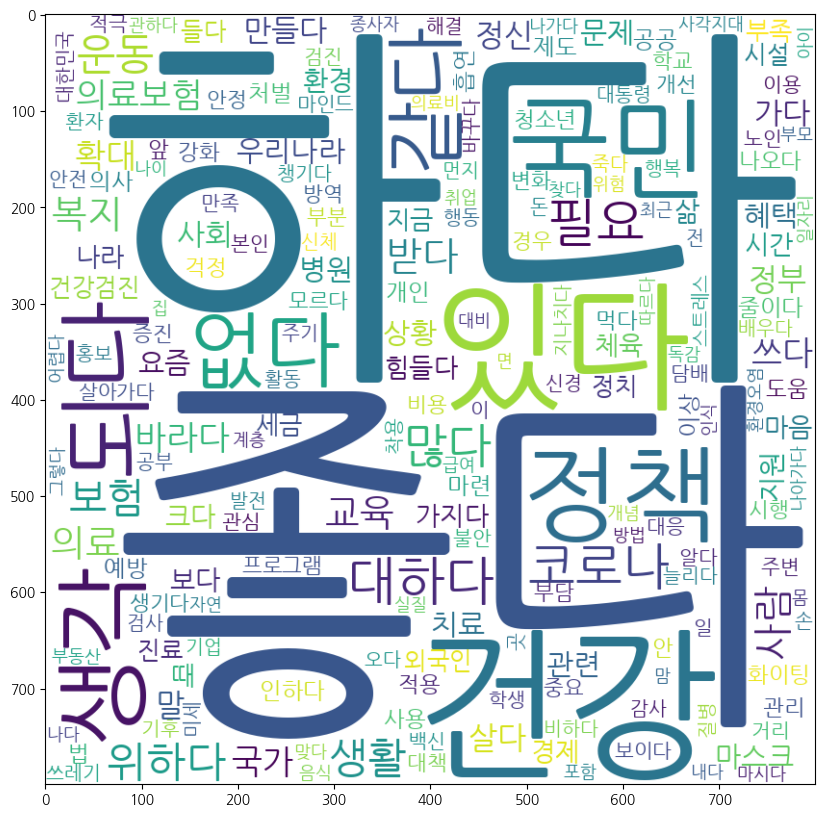

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
wordcloud = wordcloud.generate_from_frequencies(Counter(df_specific_tokens))

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.to_array(), interpolation="bilinear")
plt.show()

## 단어 빈도 시각화

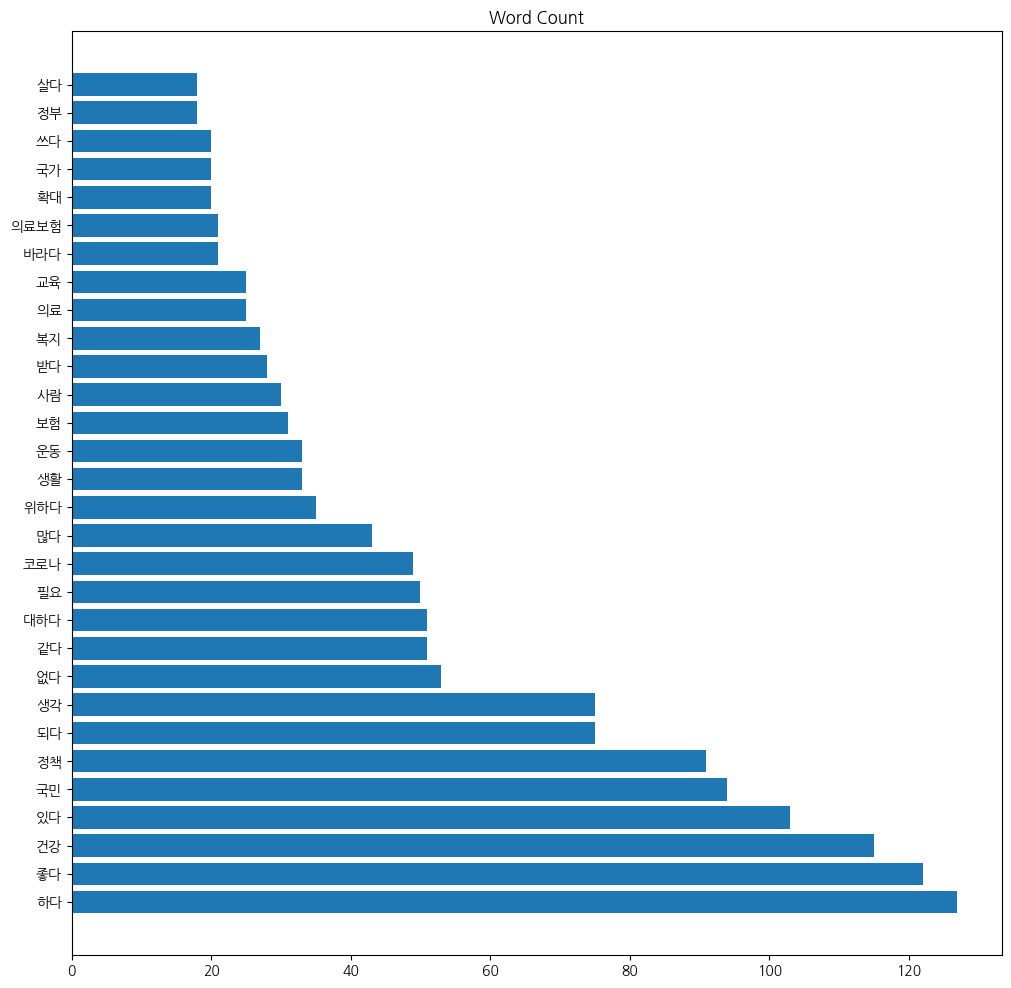

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## 워드클라우드(WordCloud)

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [ ]:
!pip install wordcloud

* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color = 'white', font_path = './fonts/truetype/nanum/NanumGothic.ttf')
wc.generate_from_frequencies(top_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

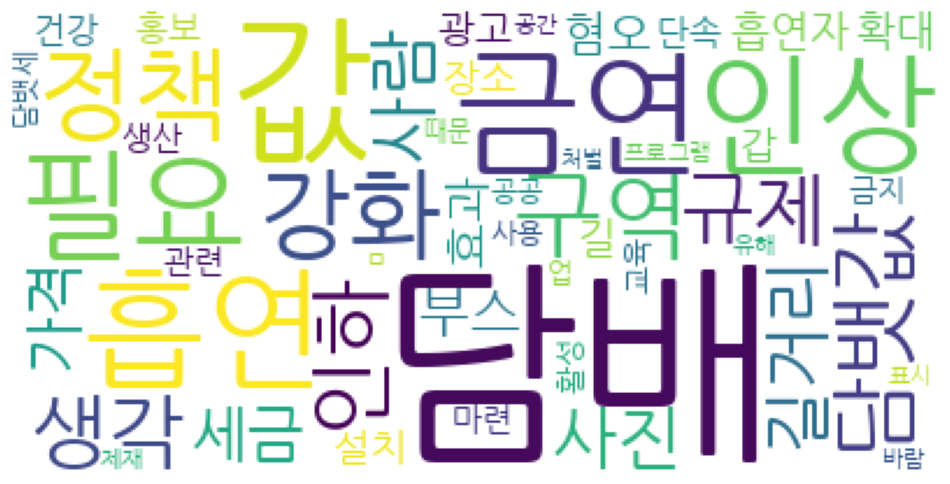

In [ ]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## squarify 트리맵 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [ ]:
!pip install squarify

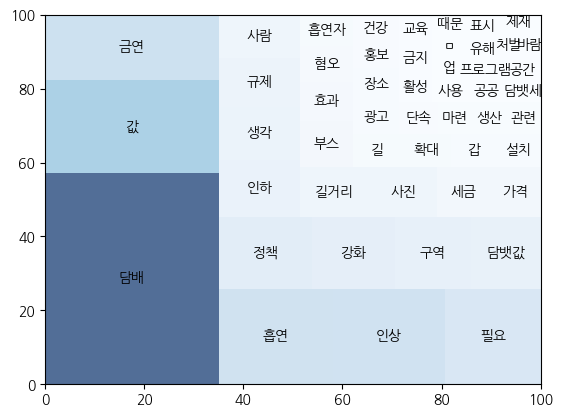

In [ ]:
import squarify
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7);
